## Loading the Dataset

In [2]:
import pandas as pd

df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


Now that we have the csv data lets understand what we are working with a little better

In [3]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We are not showing any issues with blank data df_red data

In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


You see that we have approximately 1600 values for the red wine and 5000 for the white wine.This might be an issue but there seems to be a high number for each dataset so we might want to keep this in mind when we are looking at our results

In [5]:
df_white.shape

(4898, 12)

In [6]:
df_red.shape

(1599, 12)

## Combining the Datasets

We have our red and white datasets but we want to be able to evaluate them together as we want the full picture.This will help us evaluate whether red or white wne might be a better businness venture for us:

In [7]:
# creating new column in each dataset to identify the wine type before joining the datasets
df_white["wine_type"] = 0
df_red["wine_type"] = 1

In [8]:
# now we concatenate them using the following
df_raw = pd.concat([df_red,df_white])

In [9]:
#lets check if they were combined correctly via the first two and last two rows
df_raw.iloc[[0,1,-2,-2]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
4896,5.5,0.29,0.3,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4896,5.5,0.29,0.3,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


## Exploring and Cleaning the Data

In [11]:
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


There are a few things we want to pick out: one is that the mean quality is 5.8 so that is the number that we want to beat but if we are looking to be at higher end of wine quality we would want to shoot for something above 6 which is the 75th percentile and nothing gets above a 9

In [13]:
#checking for missing values
df_raw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [14]:
#quality breakdown to look at our competition
df_raw['quality'].value_counts()
#most of the values are 6 with very few at the edges of our rating

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

This seems to follow a normal distribution and we can check that for this column and others to get a better visual understanding of our data

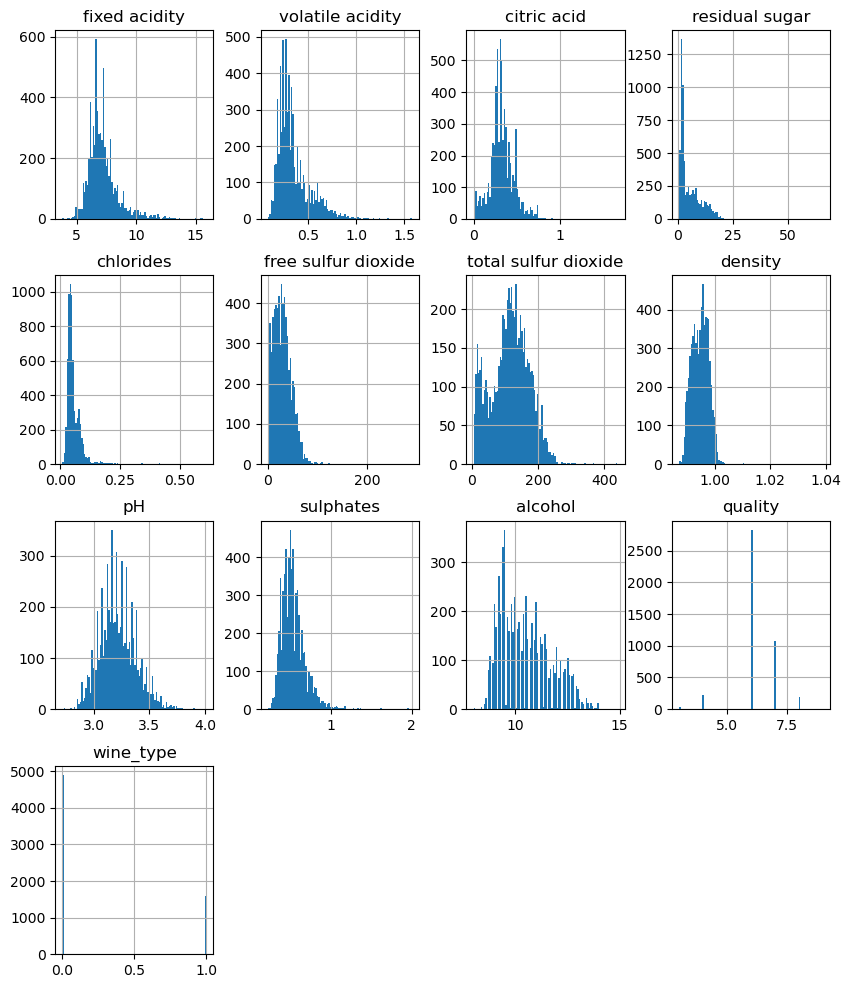

In [15]:
import matplotlib.pyplot as plt
df_raw.hist(bins = 100, figsize = (10,12))
plt.show()

A few observations that we can make from this data are as follows:

• The quality isn't in what you might think of as a normal 0-10 scale, and goes in steps.

• Much of the data falls into a bell curve/normal distribution/Gaussian distribution. 

That means most of the data is concentrated in the middle, and it tapers out in each direction.

• The exceptions on the Gaussian distribution pattern are residual sugar, which has a steep spike on the left/lower bound side. total sulfur dioxide also has more density to the left and has created more of an M shape. These observations might not be actionable now, but they could help us understand our results later.

• For some of these, breaking them down into 100 bins creates very spaced-out data.

We could decrease this to get a better picture

In [17]:
#lets check correlation between all the features
corr_matrix = df_raw.corr().round(2)
corr_matrix 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08,0.49
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27,0.65
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09,-0.19
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04,-0.35
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20,0.51
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06,-0.47
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04,-0.70
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31,0.39
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02,0.33
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04,0.49


You could show all the values but even if we create a heatmap it can be difficult to parse.The only thing we are worried about is when there is a high negative or positive correlation.To accoplish that we can use masking to get rid of anything that doesnt have a value above 0.4

In [18]:
corr_matrix = corr_matrix.applymap(lambda x: abs(x))
corr_matrix[corr_matrix > .4].style.background_gradient(cmap = 'Reds')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
fixed acidity,1.000000,nan,nan,nan,nan,nan,nan,0.460000,nan,nan,nan,nan,0.490000
volatile acidity,nan,1.000000,nan,nan,nan,nan,0.410000,nan,nan,nan,nan,nan,0.650000
citric acid,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
residual sugar,nan,nan,nan,1.000000,nan,nan,0.500000,0.550000,nan,nan,nan,nan,nan
chlorides,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,0.510000
free sulfur dioxide,nan,nan,nan,nan,nan,1.000000,0.720000,nan,nan,nan,nan,nan,0.470000
total sulfur dioxide,nan,0.410000,nan,0.500000,nan,0.720000,1.000000,nan,nan,nan,nan,nan,0.700000
density,0.460000,nan,nan,0.550000,nan,nan,nan,1.000000,nan,nan,0.690000,nan,nan
pH,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan
sulphates,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,0.490000


We can see that free sulphur dioxide has a high correlation with total sulphur dioxide so we can assume that this is something that can be dropped.The lowest correlation to the target would be a viable choice.

In [20]:
corr_matrix[['total sulfur dioxide','free sulfur dioxide']]

,total sulfur dioxide,free sulfur dioxide
fixed acidity,0.33,0.28
volatile acidity,0.41,0.35
citric acid,0.20,0.13
residual sugar,0.50,0.40
chlorides,0.28,0.20
free sulfur dioxide,0.72,1.00
total sulfur dioxide,1.00,0.72
density,0.03,0.03
pH,0.24,0.15
sulphates,0.28,0.19


From this we see taht free slfur dioxide has a higher correlation with quality so we should keep taht and drop total sulfur dioxide.Note there is also a high correlation between wine_type and the toatl sulfur dioxide.

In [22]:
df = df_raw.drop('total sulfur dioxide', axis = 1)

In [23]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.7,0.0,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,1


In [24]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.00
alcohol                 0.44
density                 0.31
volatile acidity        0.27
chlorides               0.20
wine_type               0.12
citric acid             0.09
fixed acidity           0.08
free sulfur dioxide     0.06
residual sugar          0.04
total sulfur dioxide    0.04
sulphates               0.04
pH                      0.02
Name: quality, dtype: float64

This shows you that the top four have a much stronger correlation that the rest.